In [1]:
# imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import seaborn as sns

In [11]:
import pickle
# with open("dataframes/edges_df_sorted.pk1", "rb") as f:
#     edges_df_sorted = pickle.load(f)

# with open("dataframes/edges_df.pk1", "rb") as f:
#     edges_df = pickle.load(f)

path1 = "../dataframes/df_aggregated.pk1"
with open(path1, "rb") as f:
    df = pickle.load(f)


In [12]:
df

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,abdominal aortic aneurysm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abdominal hernia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abscess of nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abscess of the lung,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abscess of the pharynx,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,white blood cell disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,whooping cough,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,wilson disease,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
771,yeast infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# build similarity matrix

### Using cosine similarity
goal is to measure the direct similarity between diseases based on their symptom vectors (or features),

In [ ]:
# Get disease names
diseases = df.iloc[:, 0]


In [ ]:
# Extract symptom matrix 
symptom_matrix = df.iloc[:, 1:].values  

# Check dimensions
print("Number of diseases:", len(diseases))
print("Number of symptoms:", symptom_matrix.shape[1])
print("Symptom matrix shape:", symptom_matrix.shape)

Number of diseases: 773
Number of symptoms: 377
Symptom matrix shape: (773, 377)


In [15]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(symptom_matrix)

In [ ]:
# Convert similarity matrix to df
cosine_df = pd.DataFrame(cosine_sim_matrix, index=diseases, columns=diseases)
print("Cosine Similarity Matrix:\n", cosine_df)

Cosine Similarity Matrix:
 diseases                   abdominal aortic aneurysm  abdominal hernia  \
diseases                                                                 
abdominal aortic aneurysm                   1.000000          0.129099   
abdominal hernia                            0.129099          1.000000   
abscess of nose                             0.000000          0.000000   
abscess of the lung                         0.204124          0.000000   
abscess of the pharynx                      0.000000          0.000000   
...                                              ...               ...   
white blood cell disease                    0.136083          0.105409   
whooping cough                              0.182574          0.000000   
wilson disease                              0.000000          0.000000   
yeast infection                             0.136083          0.105409   
zenker diverticulum                         0.000000          0.000000   

diseases  

In [ ]:
# Set diagonal values to 0 (self-similarity)
np.fill_diagonal(cosine_sim_matrix, 0)

# Find max similarity value (off-diagonal)
max_sim = np.max(cosine_sim_matrix)

# Find disease pairs with max similarity
max_pairs = np.argwhere(cosine_sim_matrix == max_sim)

# Print the most similar disease pairs
print(f"Highest Cosine Similarity: {max_sim:.4f}")
for i, j in max_pairs:
    print(f"{diseases[i]} ↔ {diseases[j]}")

Highest Cosine Similarity: 1.0000
dislocation of the knee ↔ dislocation of the patella
dislocation of the patella ↔ dislocation of the knee


In [ ]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(symptom_matrix)
cosine_df = pd.DataFrame(cosine_sim_matrix, index=diseases, columns=diseases)

np.fill_diagonal(cosine_sim_matrix, 0)

# Extract upper triangle (to avoid duplicate pairs)
upper_triangle_indices = np.triu_indices_from(cosine_sim_matrix, k=1)

# Get disease pairs and similarity scores
similarity_scores = cosine_sim_matrix[upper_triangle_indices]
disease_pairs = [(diseases[i], diseases[j]) for i, j in zip(*upper_triangle_indices)]

# df disease pairs and similarities
similarity_df = pd.DataFrame(disease_pairs, columns=["Disease 1", "Disease 2"])
similarity_df["Cosine Similarity"] = similarity_scores

# Sort by similarity in descending order 
top_50_similar = similarity_df.sort_values(by="Cosine Similarity", ascending=False).head(50)
print(top_50_similar)

                                    Disease 1  \
128725                dislocation of the knee   
260429               open wound of the finger   
190131                        heart contusion   
106541                       corneal disorder   
119683                             depression   
291476                          skin disorder   
217081             infectious gastroenteritis   
290006                   seborrheic keratosis   
284544                     psychotic disorder   
232878                           kidney stone   
291592             skin pigmentation disorder   
273708                   personality disorder   
290005                   seborrheic keratosis   
124872                   diabetic retinopathy   
124646                   diabetic retinopathy   
136590                   drug abuse (opioids)   
73441                                cataract   
237053                           liver cancer   
107093                       corneal disorder   
11461               

In [19]:
top_50_similar


,Disease 1,Disease 2,Cosine Similarity
128725,dislocation of the knee,dislocation of the patella,1.000000
260429,open wound of the finger,open wound of the hand,1.000000
190131,heart contusion,kaposi sarcoma,1.000000
106541,corneal disorder,dry eye of unknown cause,0.953463
119683,depression,post-traumatic stress disorder (ptsd),0.953463
291476,skin disorder,skin polyp,0.953463
217081,infectious gastroenteritis,noninfectious gastroenteritis,0.916667
290006,seborrheic keratosis,skin polyp,0.909091
284544,psychotic disorder,schizophrenia,0.909091
232878,kidney stone,pyelonephritis,0.909091


## Agglomerative hierarchical clustering (AHC)
Hierarchical clustering iteratively identifies groups of nodes with high similarity.
Agglomerative algorithms merge nodes and communities with high similarity. 

In this case...


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [23]:
# Extract disease pairs and their cosine similarity values
disease_pairs = top_50_similar[['Disease 1', 'Disease 2']].values
similarity_values = top_50_similar['Cosine Similarity'].values

In [24]:
# Create a disease list from the top 50 pairs (unique diseases)
diseases_list = np.unique(disease_pairs)


In [25]:
# Create a zero matrix for the similarity values between diseases
similarity_matrix = np.zeros((len(diseases_list), len(diseases_list)))

In [26]:
# Fill in the similarity values from top_50_similar
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    idx1 = np.where(diseases_list == disease_1)[0][0]
    idx2 = np.where(diseases_list == disease_2)[0][0]
    similarity_matrix[idx1, idx2] = similarity
    similarity_matrix[idx2, idx1] = similarity  # Symmetric matrix

In [ ]:
distance_matrix = 1 - similarity_matrix  # Cosine distance = 1 - cosine similarity

Z = linkage(distance_matrix, method='complete') #  compact and distinct group
# Z = linkage(distance_matrix, method='complete') # strict separation of diseases

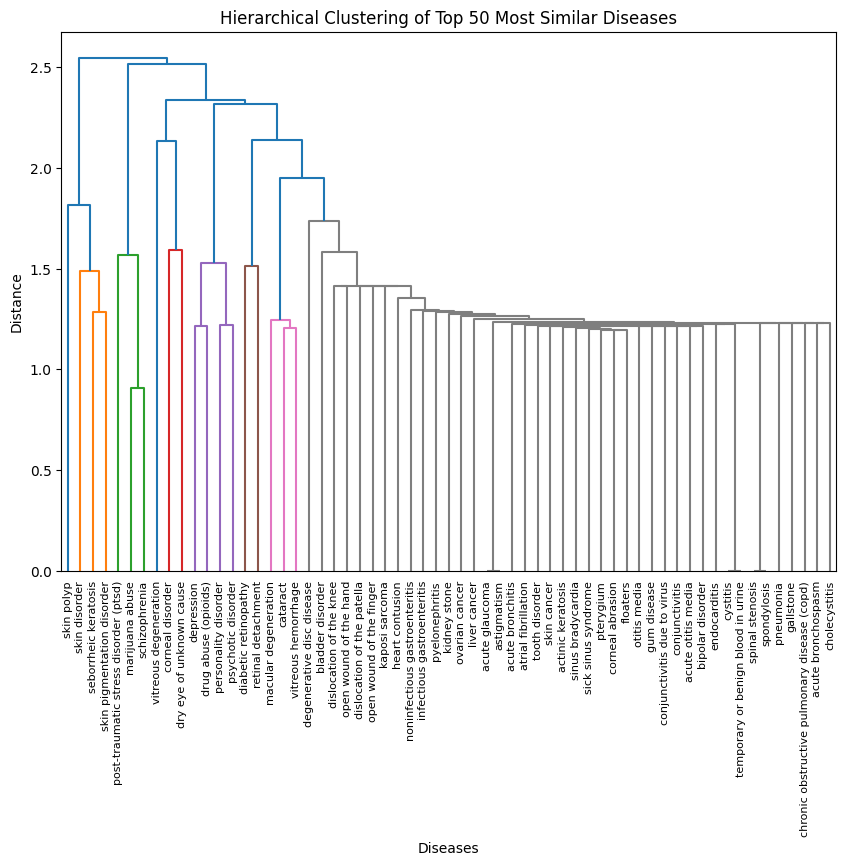

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=diseases_list, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering of Top 50 Most Similar Diseases")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

### Using Louvain Algorithm


In [ ]:
G = nx.Graph()

for disease in diseases_list:
    G.add_node(disease)

In [54]:
# Add edges with similarity weights
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    if similarity > 0:  # Ignore zero similarity pairs
        G.add_edge(disease_1, disease_2, weight=similarity)


In [55]:
import community as community_louvain  # pip install python-louvain

In [ ]:
partition = community_louvain.best_partition(G, weight='weight')

# Convert the partition dictionary into clusters
from collections import defaultdict

In [57]:
clusters = defaultdict(list)
for disease, community_id in partition.items():
    clusters[community_id].append(disease)

In [ ]:
for community_id, disease_group in clusters.items():
    print(f"Community {community_id}: {disease_group}")

Community 0: ['actinic keratosis', 'seborrheic keratosis', 'skin cancer', 'skin disorder', 'skin pigmentation disorder', 'skin polyp']
Community 1: ['acute bronchitis', 'chronic obstructive pulmonary disease (copd)']
Community 2: ['acute bronchospasm', 'pneumonia']
Community 3: ['acute glaucoma', 'astigmatism', 'cataract', 'corneal abrasion', 'corneal disorder', 'diabetic retinopathy', 'dry eye of unknown cause', 'macular degeneration', 'retinal detachment', 'vitreous degeneration', 'vitreous hemorrhage']
Community 4: ['acute otitis media', 'otitis media']
Community 5: ['atrial fibrillation', 'endocarditis']
Community 6: ['bipolar disorder', 'depression', 'drug abuse (opioids)', 'marijuana abuse', 'personality disorder', 'post-traumatic stress disorder (ptsd)', 'psychotic disorder', 'schizophrenia']
Community 7: ['bladder disorder', 'cystitis', 'temporary or benign blood in urine']
Community 9: ['cholecystitis', 'gallstone']
Community 10: ['conjunctivitis', 'conjunctivitis due to virus